# Compare Name with Expensive and Cheaper AirBnB Listing

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
from scipy import stats


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.metrics

In [2]:
# Load data
listing_df = pd.read_csv('listings.csv')

In [3]:
# Looking at the head of the data
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20211207182339,2021-12-09,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,4.90,4.65,4.75,NaN,f,2,1,1,0,0.16
1,15400,https://www.airbnb.com/rooms/15400,20211207182339,2021-12-09,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,4.82,4.93,4.73,NaN,f,1,1,0,0,0.61
2,17402,https://www.airbnb.com/rooms/17402,20211207182339,2021-12-09,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,4.66,4.85,4.59,NaN,f,1,1,0,0,0.33
3,17506,https://www.airbnb.com/rooms/17506,20211207182339,2021-12-09,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
4,25123,https://www.airbnb.com/rooms/25123,20211207182339,2021-12-09,Clean big Room in London (Room 1),Big room with double bed/ clean sheets/ clean ...,Barnet is one of the largest boroughs in Londo...,https://a0.muscache.com/pictures/456905/a004b9...,103583,https://www.airbnb.com/users/show/103583,...,4.89,4.45,4.74,NaN,t,3,0,3,0,0.91


In [4]:
columns_to_keep = ['name', 'price']

In [5]:
# Make a new data frame with only the important columns
listing_df = listing_df[columns_to_keep]

In [6]:
listing_df.isnull().sum() #checking for any NaN values 

name     24
price     0
dtype: int64

In [7]:
#create a new dataframe and drop the null values 
listing_df2= listing_df.dropna()

In [8]:
listing_df2

,name,price
0,Holiday London DB Room Let-on going,$65.00
1,Bright Chelsea Apartment. Chelsea!,$75.00
2,Superb 3-Bed/2 Bath & Wifi: Trendy W1,$265.00
3,Boutique Chelsea/Fulham Double bed 5-star ensuite,$150.00
4,Clean big Room in London (Room 1),$29.00
...,...,...
66636,Private 3 bedroom Crystal palace in high street,$120.00
66637,"Chiswick Park 3 bed 2 bath, Chiswick, West London",$288.00
66638,Shabby Chic 2 Beds Bungalow in Woodgreen,$104.00
66639,Outstanding Luxury 2Bed 2.5Bath Notting Hill Gate,$402.00


## Create a Dataframe with Name of Properties with the expensive listings

In [9]:
# Creating a dataframe of the name of the 100 most expensive listings
summaryDF = listing_df2[['name','price']]
summaryDF = summaryDF[pd.notnull(summaryDF['name'])]
summaryDF = summaryDF[summaryDF['name']!=0]
summaryDF = summaryDF.sort_values('price',ascending=[0])
top100DF = summaryDF.head(100)
top100DF.head()

,name,price
26151,Central and cosy with large balcony and sunlight!,$999.00
17889,Superb location 1 bed flat own entrance Chelsea,$999.00
42687,Quirky Penthouse Conversion near Battersea Park,$999.00
42227,"Sleek 4BR, garden, 15min from King's Cross (Ve...",$999.00
43450,Elegant 3 Bed Family Flat in Lambeth,$999.00


## Preprocessing the Data to remove some stopwords 

In [10]:
from nltk.corpus import stopwords
import string
import nltk

# Some data cleaning

words=''
for index,row in top100DF.iterrows():
    words += row['name']

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] #include only english words 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'central cosy large balcony sunlight superb locatio'

## WordCloud of the Names with the top 100 expensive listings 

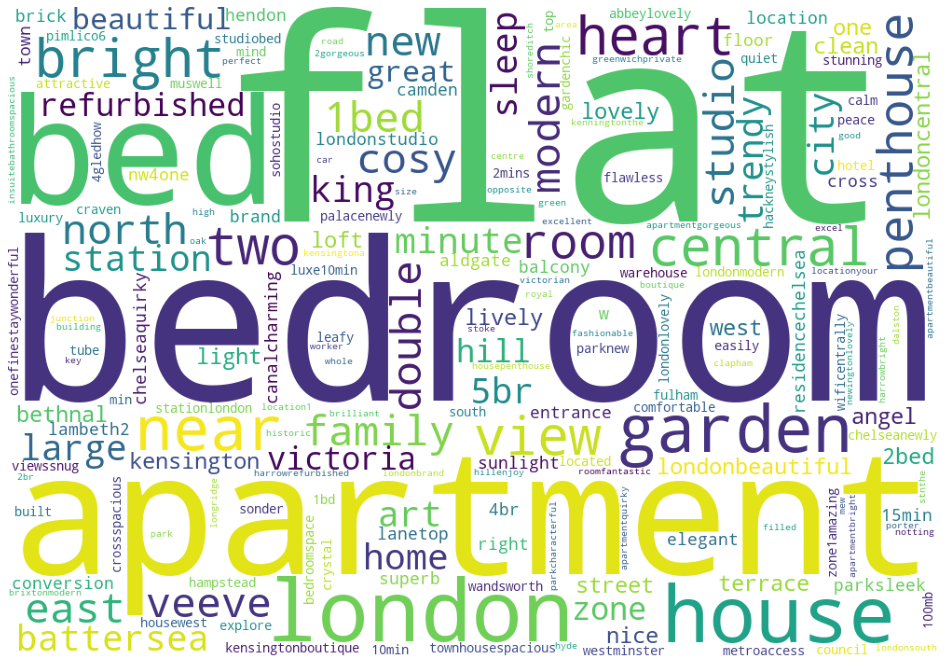

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Create a Dataframe with Name of Properties with the cheaper listings

In [12]:
# Creating a dataframe of the name of the 100 most cheapest listings
summaryLowDF = listing_df2[['name','price']]
summaryLowDF = summaryLowDF[pd.notnull(summaryLowDF['name'])]
summaryLowDF = summaryLowDF[summaryLowDF['name']!=0]
summarLowyDF = summaryLowDF.sort_values('price',ascending=[1])
bot100DF = summaryLowDF.head(100)
bot100DF.sample(n=5)

,name,price
18,Room in relaxed family house!,$37.00
71,"Cosy Double room London, River View",$32.00
27,Best Part of Town -Home from Home!,$125.00
54,Peaceful Room Near Epping Forest,$60.00
12,Stylish bedsit in Notting Hill ish flat.,$42.00


## Preprocessing the Data to remove some stopwords 

In [13]:
# Some data cleaning

words=''
for index,row in bot100DF.iterrows():
    words += row['name']

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'holiday london db room let-on goingbright chelsea '

## WordCloud of the Names with the top 100 cheap listings 

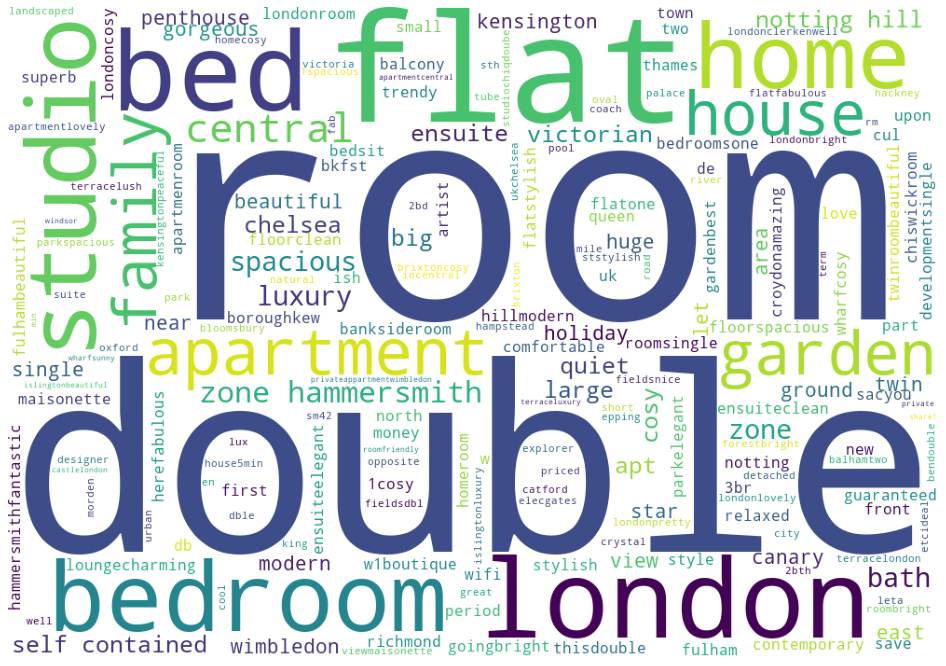

In [14]:
wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Here we have seen the most common words in the summary of the cheapest listings. As it can be seen from the wordcloud, indeed there are overlapping words with the most expensive listings. Words like: 'bedroom', 'family', 'flat' appear frequently in both. So they do not tell us anything special. However, words like: 'apartment', 'near' & 'central' appear more frequently in expensive listings as opposed to cheaper listings. So it turns out that indeed there are certain words which appear more frequently among expensive listings.

Ignoring the "br" which is the bracket. We can see that "london", "space", apartment" is much more popular in the description section 